# Build Marine Heat Waves

In [77]:
# Load required modules
import numpy as np
import os
import sys
import glob
from importlib import reload

from datetime import date
from matplotlib import pyplot as plt

# Load marineHeatWaves definition module
import marineHeatWaves as mhw

# Iris
import iris
#import iris.plot as iplt
from iris import quickplot

# Profiling

# Setup

In [9]:
%matplotlib notebook

In [2]:
noaa_path = '/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/'

In [3]:
all_sst_files = glob.glob(noaa_path+'sst*nc')
all_sst_files.sort()
len(all_sst_files)

39

## Cut down for testing

In [5]:
cut_sst_files = all_sst_files[5:10]
cut_sst_files

['/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1986.nc',
 '/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1987.nc',
 '/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1988.nc',
 '/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1989.nc',
 '/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1990.nc']

# Is this enough?

In [6]:
WA_constraint = iris.Constraint(latitude=lambda cell: -30 < cell < -29., longitude=lambda cell: 112. < cell < 113)

In [7]:
t = []
SSTs = []
for ifile in cut_sst_files:
    print(ifile)
    cubes = iris.load(ifile)
    sst = cubes[0]
    #
    WA_sst = sst.extract(WA_constraint)
    WA_T = WA_sst.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)
    # Append
    t += (WA_T.coord('time').points + 657072).astype(int).tolist()  # 1880?
    SSTs += WA_T.data.tolist()
#
t = np.array(t)
SSTs = np.array(SSTs)

/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1986.nc


/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1987.nc


/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1988.nc


/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1989.nc


/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1990.nc


/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [20]:
del WA_T, sst, cubes

## Plot

In [8]:
dates = [date.fromordinal(tt.astype(int)) for tt in t]

<IPython.core.display.Javascript object>


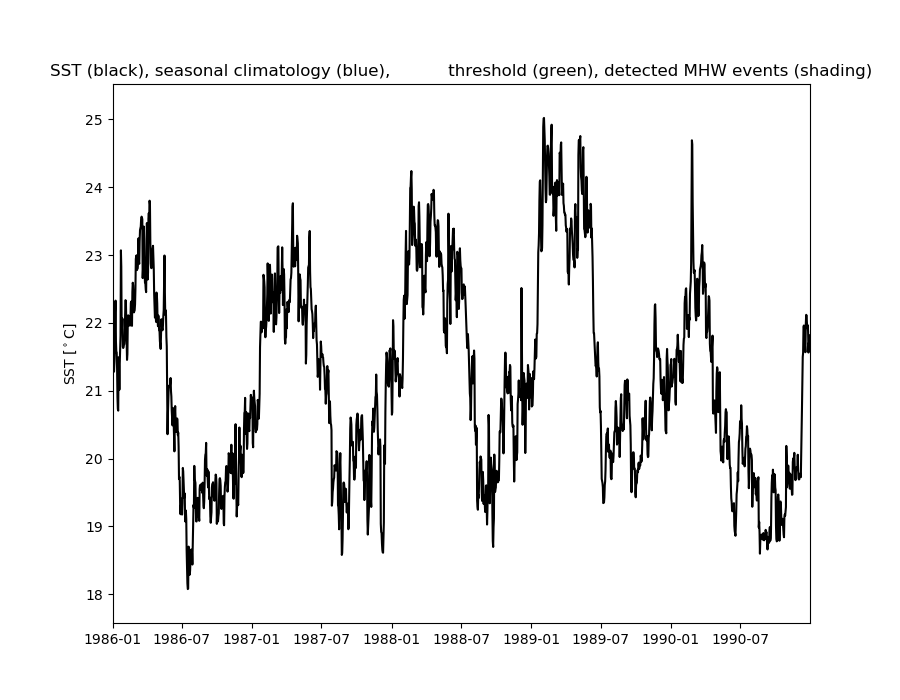

In [11]:
sst = SSTs
plt.figure(figsize=(9,7))
plt.subplot(1,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
#plt.plot(dates, clim['thresh'], 'g-')
#plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(t[0], t[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.show()

## MWH detection

In [12]:
mhws, clim = mhw.detect(t, SSTs, joinAcrossGaps=True)

In [13]:
mhws['n_events']

15

In [14]:
ev = np.argmax(mhws['intensity_max']) # Find largest event
print('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C')
print('Average intensity:', mhws['intensity_mean'][ev], 'deg. C')
print('Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days')
print('Duration:', mhws['duration'][ev], 'days')
print('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))

Maximum intensity: 2.6972956380536495 deg. C
Average intensity: 2.3523488911315917 deg. C
Cumulative intensity: 16.466442237921143 deg. C-days
Duration: 7 days
Start date: 31 January 1989
End date: 06 February 1989


### Plot

In [16]:
ev

7

<IPython.core.display.Javascript object>


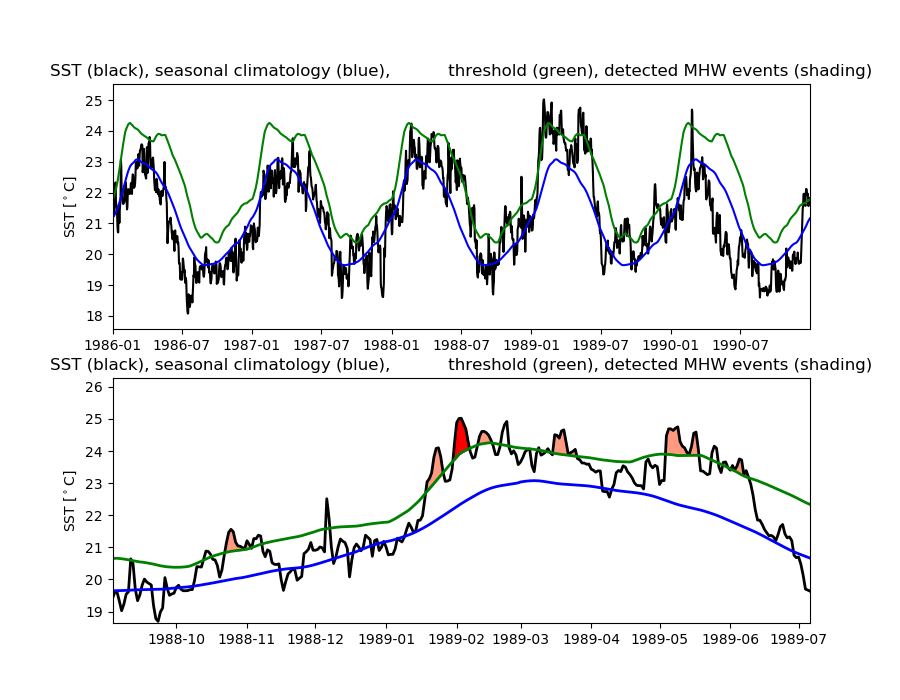

Text(0, 0.5, 'SST [$^\\circ$C]')

In [17]:
sst = SSTs
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(t[0], t[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-5, ev+5, 1):
    t1 = np.where(t==mhws['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest (2011 WA event) and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, sst, 'k-', linewidth=2)
plt.plot(dates, clim['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(mhws['time_start'][ev]-150, mhws['time_end'][ev]+150)
plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
plt.ylabel(r'SST [$^\circ$C]')

----

# Load the 5 cubes into memory

In [21]:
all_sst = []
for ifile in cut_sst_files:
    print(ifile) # For progress
    cubes = iris.load(ifile)
    sst = cubes[0]
    # Get out of lazy
    _ = sst.data
    # Append
    all_sst.append(sst)

In [32]:
[sst.data.nbytes/1e9 for sst in all_sst]

[1.513728, 1.513728, 1.5178752, 1.513728, 1.513728]

# Coords

In [33]:
lat_coord = all_sst[0].coord('latitude')
lon_coord = all_sst[0].coord('longitude')

## Lat

In [68]:
lat_coord[360].points[0]

0.125

In [37]:
lat_coord.shape[0]

720

## Lon

In [46]:
lon_coord.shape

(1440,)

In [47]:
lon_coord[720]

DimCoord(array([180.125], dtype=float32), standard_name='longitude', units=Unit('degrees'), long_name='Longitude', var_name='lon', attributes={'actual_range': array([1.25000e-01, 3.59875e+02], dtype=float32)})

## Events

In [102]:
events_coord = iris.coords.DimCoord(np.arange(100), var_name='events')

# Small loop

In [59]:
def grab_t(sst_list):
    allts = []
    for sst in sst_list:
        allts += (sst.coord('time').points + 657072).astype(int).tolist()  # 1880?
    return np.array(allts)

In [39]:
def grab_T(sst_list, i, j):
    allTs = []
    for sst in sst_list:
        allTs += sst.data[:,i,j].tolist()
    return np.array(allTs)

In [52]:
tst = grab_T(all_sst, 360, 720)
tst

array([27.89999962, 28.02999878, 28.22999954, ..., 29.54999924,
       29.39999962, 29.34000015])

In [60]:
t = grab_t(all_sst)
t

array([725007, 725008, 725009, ..., 726830, 726831, 726832])

## Here we go

In [70]:
all_mhw = []
for ilat in range(355,365): # range(lat_coord.shape[0])
    for jlon in range(715,725):
        # Temperatures
        SSTs = grab_T(all_sst, ilat, jlon)
        # Detect
        mhws, clim = mhw.detect(t, SSTs, joinAcrossGaps=True)
        # Save indices
        mhws['ilat'] = ilat
        mhws['jlon'] = jlon
        # Print me
        print('lat={}, lon={}, nevent={}'.format(lat_coord[ilat].points[0], lon_coord[jlon].points[0],
                                                mhws['n_events']))
        # Save the dict
        all_mhw.append(mhws)

lat=-1.125, lon=178.875, nevent=12
lat=-1.125, lon=179.125, nevent=11
lat=-1.125, lon=179.375, nevent=10
lat=-1.125, lon=179.625, nevent=12
lat=-1.125, lon=179.875, nevent=13
lat=-1.125, lon=180.125, nevent=14
lat=-1.125, lon=180.375, nevent=11
lat=-1.125, lon=180.625, nevent=10
lat=-1.125, lon=180.875, nevent=14
lat=-1.125, lon=181.125, nevent=13
lat=-0.875, lon=178.875, nevent=11
lat=-0.875, lon=179.125, nevent=10
lat=-0.875, lon=179.375, nevent=11
lat=-0.875, lon=179.625, nevent=11
lat=-0.875, lon=179.875, nevent=13
lat=-0.875, lon=180.125, nevent=13
lat=-0.875, lon=180.375, nevent=12
lat=-0.875, lon=180.625, nevent=9
lat=-0.875, lon=180.875, nevent=10
lat=-0.875, lon=181.125, nevent=11
lat=-0.625, lon=178.875, nevent=12
lat=-0.625, lon=179.125, nevent=10
lat=-0.625, lon=179.375, nevent=9
lat=-0.625, lon=179.625, nevent=8
lat=-0.625, lon=179.875, nevent=9
lat=-0.625, lon=180.125, nevent=14
lat=-0.625, lon=180.375, nevent=13
lat=-0.625, lon=180.625, nevent=10
lat=-0.625, lon=180.875,

----

# Save time

## Investigate

In [78]:
all_mhw[0].keys()

dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'category', 'rate_onset', 'rate_decline', 'n_events', 'ilat', 'jlon'])

In [79]:
imhw = all_mhw[0]
for key in imhw.keys():
    if isinstance(imhw[key], list):
        print('{} is a list with len={} and type={}'.format(key, len(imhw[key]), type(imhw[key][0])))
    else:
        print('{} has type={}'.format(key, type(imhw[key])))

time_start is a list with len=12 and type=<class 'numpy.int64'>
time_end is a list with len=12 and type=<class 'numpy.int64'>
time_peak is a list with len=12 and type=<class 'numpy.int64'>
date_start is a list with len=12 and type=<class 'datetime.date'>
date_end is a list with len=12 and type=<class 'datetime.date'>
date_peak is a list with len=12 and type=<class 'datetime.date'>
index_start is a list with len=12 and type=<class 'numpy.int64'>
index_end is a list with len=12 and type=<class 'numpy.int64'>
index_peak is a list with len=12 and type=<class 'numpy.int64'>
duration is a list with len=12 and type=<class 'int'>
duration_moderate is a list with len=12 and type=<class 'numpy.int64'>
duration_strong is a list with len=12 and type=<class 'numpy.int64'>
duration_severe is a list with len=12 and type=<class 'numpy.int64'>
duration_extreme is a list with len=12 and type=<class 'numpy.int64'>
intensity_max is a list with len=12 and type=<class 'numpy.float64'>
intensity_mean is a li

In [85]:
sys.getsizeof(imhw['time_start'][0])

32

In [86]:
sys.getsizeof(imhw['intensity_max'][0])

32

## Test Cube

In [94]:
all_time_start = np.zeros((lat_coord.shape[0], lon_coord.shape[0], 100), dtype=np.int32)
all_time_start[355,715,:12] = imhw['time_start']

In [91]:
all_time_start[355,715,:]

array([725273, 725467, 725487, 725501, 725519, 725549, 725597, 725669,
       725713, 725770, 726521, 726546,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0], dtype=int32)

In [103]:
cube_time_start = iris.cube.Cube(all_time_start,
                          #standard_name='test',
                          #units='K',
                          var_name='time_start',
                          dim_coords_and_dims=[(lat_coord, 0),
                                               (lon_coord, 1),
                                               (events_coord, 2)])

In [104]:
cube_time_start

Time Start (unknown),latitude,longitude,events
Shape,720,1440,100
Dimension coordinates,,,
latitude,x,-,-
longitude,-,x,-
events,-,-,x


## One more

In [95]:
all_time_end = np.zeros((lat_coord.shape[0], lon_coord.shape[0], 100), dtype=np.int32)
all_time_end[355,715,:12] = imhw['time_end']

In [100]:
cube_time_end = iris.cube.Cube(all_time_end, units='day',
                          var_name='time_end',
                          dim_coords_and_dims=[(lat_coord, 0),
                                               (lon_coord, 1)])

## Cubes

In [101]:
cubes = iris.cube.CubeList([cube_time_start, cube_time_end])
cubes

Time Start (unknown),latitude,longitude,--
Shape,720,1440,100
Dimension coordinates,,,
latitude,x,-,-
longitude,-,x,-
Time End (day),latitude,longitude,--
Shape,720,1440,100
Dimension coordinates,,,
latitude,x,-,-
longitude,-,x,-


## Save

In [98]:
iris.save(cubes, 'test.nc', zlib=True)

## Reload

In [99]:
cubes2 = iris.load('test.nc')
cubes2

[<iris 'Cube' of time_start / (1) (latitude: 720; longitude: 1440; -- : 100)>,
<iris 'Cube' of time_end / (1) (latitude: 720; longitude: 1440; -- : 100)>]